## Build a Simple Workflow using LangGraph

1. Nodes - Python functions - Tasks
2. Edges - Connect the nodes - conditional edges
3. State - State schema serves as the i/p for all nodes & edges
4. StateGraph - Structure of the entire graph

#### State

First, define the state of the graph.

The state schema serves as the input schema for all nodes and edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [5]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str
    

### Nodes

Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state']

Each node returns a new value of the state key graph_state

By default the new value returned by each node will override the prior state value.


In [6]:
def start_play(state: State):
    print("Start_Play node has been called")
    return {"graph_info": state["graph_info"] + "I'm planning to play"}

def cricket(state: State):
    print("My cricket node has been called")
    return {"graph_info": state["graph_info"] + " cricket"}

def football(state: State):
    print("My football node has been called")
    return {"graph_info": state["graph_info"] + " football"}

In [7]:
import random
from typing import Literal

# The function can return only on of the two values
def random_play(state: State) -> Literal["cricket", "football"]:
    graph_info = state["graph_info"]

    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"

### Graph Construction

Now, we build the graph from our components defined above.

The StateGraph class is the graph class we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START node, a special node that sends user input to the graph, to indicate where to start our graph.

The END node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

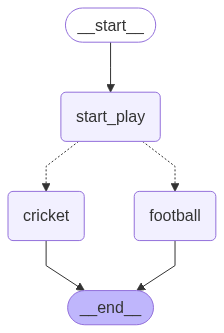

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build Graph
graph = StateGraph(State)

## Adding the nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

## Schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

## Compile the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))